<a href="https://colab.research.google.com/github/prashant-1134/Demo_repo/blob/main/ML_Group_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ML_Group_06 {103,104,105,106}**
#**ASSIGNMENT-1:SIMPLE LINEAR REGRESSION**


Index(['YearsExperience', 'Salary'], dtype='object')
Slope, Intercept: 9449.962321455077 25792.20019866869


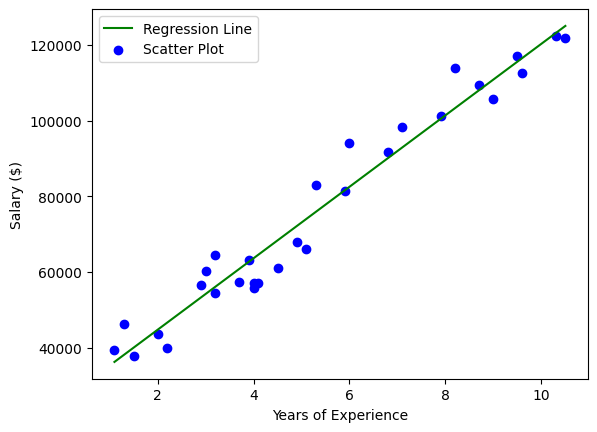

Root Mean Squared Error: 5592.043608760662
Accuracy: 95.69566641435085
Enter Years of Experience: 10


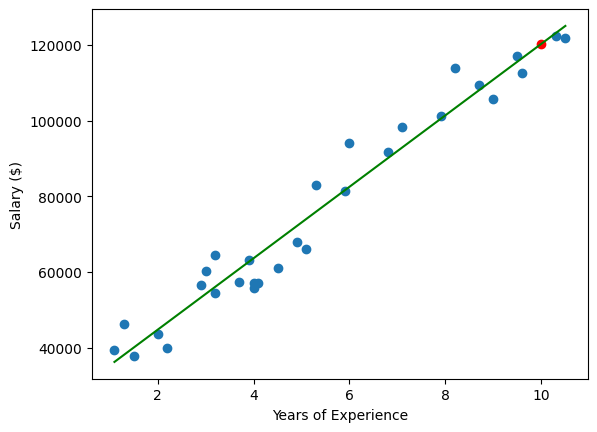

Predicted Salary for 10.0 Years of Experience: 120291.82341321948


In [8]:
# Install necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Load dataset
data = pd.read_csv('salary_data.csv')
# Print the column names to verify if 'YearsExperience' exists
print(data.columns)
# Collecting X and Y
# Adjust the column name if it's different based on the output above
X = data['YearsExperience'].values
Y = data['Salary'].values
# Calculate Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
# Total number of values
m = len(X)
# Using the formula to calculate b1 (slope) and b0 (intercept)
numer = sum((X - mean_x) * (Y - mean_y))
denom = sum((X - mean_x) ** 2)
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)
# Print coefficients: b1, b0
print("Slope, Intercept:", b1, b0)
# Plotting Values and Regression Line
max_x = np.max(X)
min_x = np.min(X)
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x
plt.plot(x, y, color='green', label='Regression Line')
plt.scatter(X, Y, c='blue', label='Scatter Plot')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ($)')
plt.legend()
plt.show()
# Calculating Root Mean Squared Error (RMSE)
rmse = np.sqrt(sum((Y - (b0 + b1 * X)) ** 2) / m)
print("Root Mean Squared Error:", rmse)
# Calculating R-squared (Accuracy)
ss_total = sum((Y - mean_y) ** 2)
ss_residual = sum((Y - (b0 + b1 * X)) ** 2)
r2 = 1 - (ss_residual / ss_total)
print("Accuracy:", r2 * 100)
# Predicting a new output (y) for a new value of x
predict_x = float(input('Enter Years of Experience: '))
predict_y = b0 + b1 * predict_x
plt.scatter(X, Y)
plt.scatter(predict_x, predict_y, color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ($)')
# Plotting the regression line
plt.plot(x, y, color='green')
plt.show()
print("Predicted Salary for {} Years of Experience: {}".format(predict_x, predict_y))

#**ML_Group_06 {103,104,105,106}**
# **ASSIGNMENT -2:Principal Component Analysis for feature reduction**

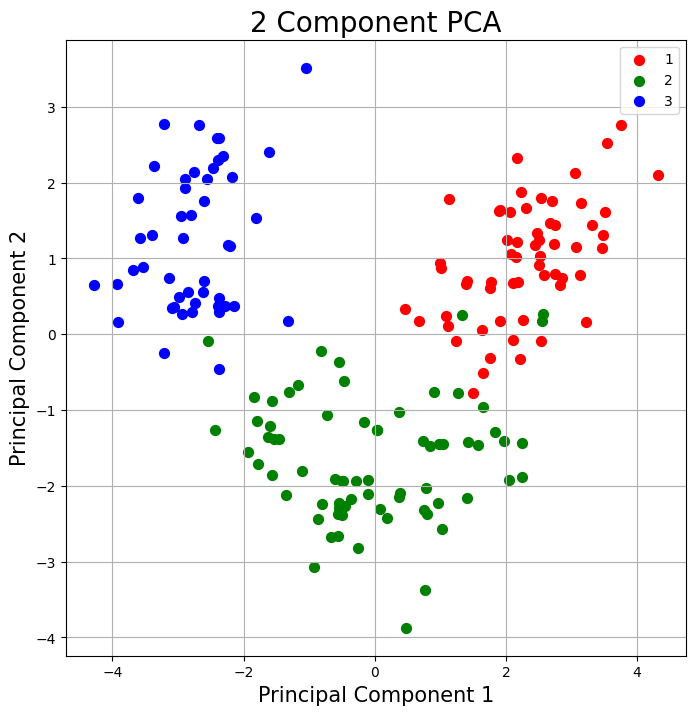

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Load the Wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
df = pd.read_csv(url, header=None)

# Assign column names
df.columns = ['target', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
              'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
              'Proanthocyanins', 'Color intensity', 'Hue',
              'OD280/OD315 of diluted wines', 'Proline']

# Display the first few rows of the dataframe


# Standardize the data
features = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
            'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
            'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
x = df.loc[:, features].values
y = df.loc[:,['target']].values

x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()

# PCA Projection to 2D
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2'])
principalDf.head()

df[['target']].head()

finalDf = pd.concat([principalDf, df[['target']]], axis=1)
finalDf.head()

# Visualize 2D Projection
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 Component PCA', fontsize=20)

targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c=color, s=50)
ax.legend(targets)
ax.grid()


In [ ]:
df.head()

,target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
#Explained Variance:The explained variance tells us how much information (variance)
#can be attributed to each of the principal components.
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

#**ML_Group_06 {103,104,105,106}**
# **ASSIGNMENT - 3 : Decision Tree**

     sepal_length  sepal_width  petal_length  petal_width
0               8           14             4            1
1               6            9             4            1
2               4           11             3            1
3               3           10             5            1
4               7           15             4            1
..            ...          ...           ...          ...
145            24            9            28           19
146            20            4            26           15
147            22            9            28           16
148            19           13            30           19
149            16            9            27           14

[150 rows x 4 columns]
Prediction: ['setosa']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


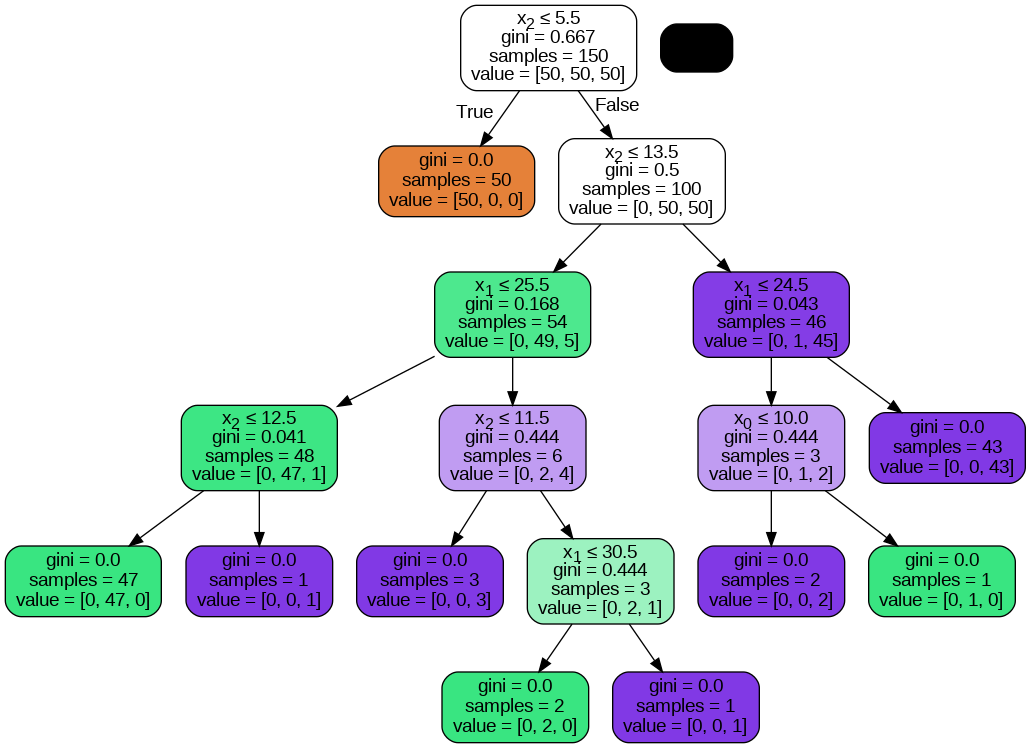

In [ ]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#reading Dataset
dataset=pd.read_csv("iris.csv")
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,4].values

#Perform Label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

X = X.apply(LabelEncoder().fit_transform)
print (X)

from sklearn.tree import DecisionTreeClassifier
regressor=DecisionTreeClassifier()
regressor.fit(X.iloc[:,1:5],y)

#Predict value for the given expression
#Change here: X_in should have 3 features instead of 4, to match the training data
X_in=np.array([1,0,1]) # Example with 3 features - adjust as needed

y_pred=regressor.predict([X_in])
print ("Prediction:", y_pred)

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
# Create DOT data
dot_data = StringIO()

export_graphviz(regressor, out_file=dot_data, filled=True, rounded=True, special_characters=True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Decision_Tree.png')
# Show graph
Image(graph.create_png())

#**ML_Group_06 {103,104,105,106}**
# **ASSIGNMENT - 4 : Naive Bayes**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix


dataset=pd.read_csv("IRIS1.csv")


#Spliting the dataset in independent and dependent variables
X = dataset.iloc[:,:4].values
y = dataset['variety'].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

# Feature Scaling to bring the variable in a single scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Naive Bayes Classification to the Training set with linear kernel
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))

[[11  0  0]
 [ 0  8  1]
 [ 0  1  9]]
Correct predictions:  28
False predictions 2


Accuracy of the Naive Bayes Clasification is:  0.9333333333333333


#**ML_Group_06 {103,104,105,106}**
# **Assignment-5:SVM**

In [ ]:
# Load the important packages
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC



In [ ]:
# Load the datasets
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target



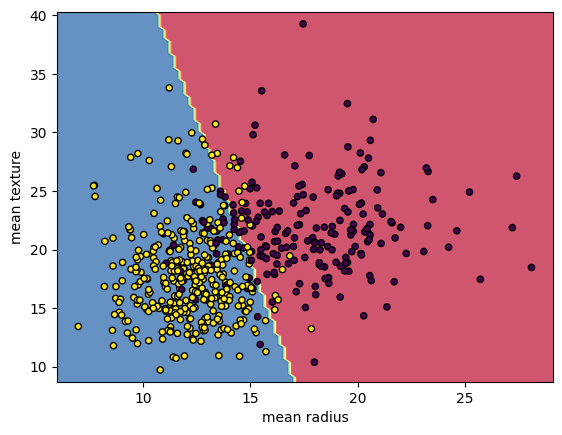

In [ ]:
#Build the model
svm = SVC(kernel="linear")
# Trained the model
svm.fit(X, y)

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
		svm,
		X,
		response_method="predict",
		cmap=plt.cm.Spectral,
		alpha=0.8,
		xlabel=cancer.feature_names[0],
		ylabel=cancer.feature_names[1],
	)

# Scatter plot
plt.scatter(X[:, 0], X[:, 1],
			c=y,
			s=20, edgecolors="k")
plt.show()


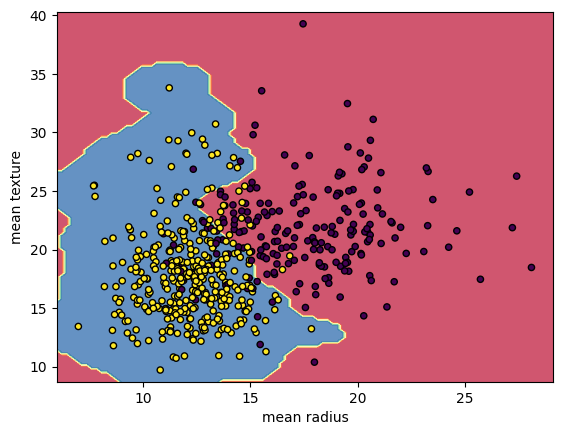

In [ ]:
#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X, y)

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
		svm,
		X,
		response_method="predict",
		cmap=plt.cm.Spectral,
		alpha=0.8,
		xlabel=cancer.feature_names[0],
		ylabel=cancer.feature_names[1],
	)

# Scatter plot
plt.scatter(X[:, 0], X[:, 1],
			c=y,
			s=20, edgecolors="k")
plt.show()


#**ML_Group_06 {103,104,105,106}**
# **Assignment-6: KMeans -Assignment**

[[0.1  0.6 ]
 [0.15 0.71]
 [0.08 0.9 ]
 [0.16 0.85]
 [0.2  0.3 ]
 [0.25 0.5 ]
 [0.24 0.1 ]
 [0.3  0.2 ]]


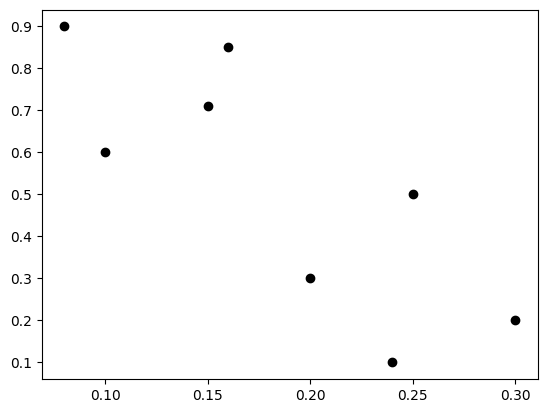

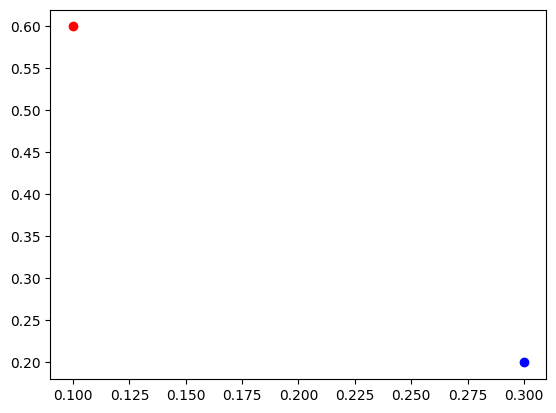

[[0.1 0.3]
 [0.6 0.2]]
point No.6[0.25,0.5] is belongs to blue cluster(cluster no:2)


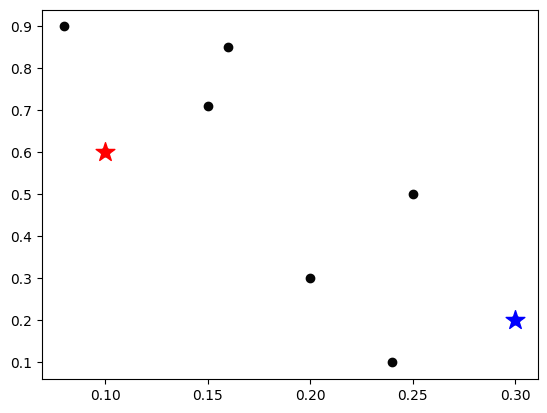

[1 1 1 1 0 0 0 0]
No of population around cluster 2: 3
Previous value of m1 and m2 is:
M1== [0.1 0.3]
M1== [0.6 0.2]
Updated value of m1 and m2 is:
M1== [0.2475 0.275 ]
M1== [0.1225 0.765 ]


In [ ]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#create dataset using DataFrame
df=pd.DataFrame({'X':[0.1,0.15,0.08,0.16,0.2,0.25,0.24,0.3],
                 'y':[0.6,0.71,0.9,0.85,0.3,0.5,0.1,0.2]})
f1 = df['X'].values
f2 = df['y'].values
X = np.array(list(zip(f1, f2)))
print(X)

#centroid points
C_x=np.array([0.1,0.3])
C_y=np.array([0.6,0.2])
centroids=C_x,C_y

#plot the given points
colmap = {1: 'r', 2: 'b'}
plt.scatter(f1, f2, color='k')
plt.show()

#for i in centroids():
plt.scatter(C_x[0],C_y[0], color=colmap[1])
plt.scatter(C_x[1],C_y[1], color=colmap[2])
plt.show()

C = np.array(list((C_x, C_y)), dtype=np.float32)
print (C)

#plot given elements with centroid elements
plt.scatter(f1, f2, c='#050505')
print("point No.6[0.25,0.5] is belongs to blue cluster(cluster no:2)")
plt.scatter(C_x[0], C_y[0], marker='*', s=200, c='r')
plt.scatter(C_x[1], C_y[1], marker='*', s=200, c='b')
plt.show()


#import KMeans class and create object of it
from sklearn.cluster import KMeans
model=KMeans(n_clusters=2,random_state=0)
model.fit(X)
labels=model.labels_
print(labels)

#using labels find population around centroid
count=0
for i in range(len(labels)):
    if (labels[i]==1):
        count=count+1

print('No of population around cluster 2:',count-1)

#Find new centroids
new_centroids = model.cluster_centers_

print('Previous value of m1 and m2 is:')
print('M1==',centroids[0])
print('M1==',centroids[1])

print('Updated value of m1 and m2 is:')
print('M1==',new_centroids[0])
print('M1==',new_centroids[1])


#**ML_Group_06 {103,104,105,106}**
# **Assignment-7: Gradient Boost Classifier**

In [ ]:
# Import all relevant libraries

from sklearn.ensemble import GradientBoostingClassifier

import numpy as np

import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn import preprocessing

import warnings

warnings.filterwarnings("ignore")

In [ ]:
#Now let’s read the dataset and look at the columns to understand the information better.
#https://drive.google.com/file/d/1zI-X3zdiuM9u74zQyKIShvAUtPJQ7jUK/view?usp=sharing
df = pd.read_csv('income_evaluation.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Here my main aim is to tell you how to implement this on python. Now for training and testing our model, the data has to be divided into train and test data.**
We will also scale the data to lie between 0 and 1.

In [ ]:
df.shape

(32561, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [ ]:
#df.drop(columns=' fnlwgt',inplace=True)
df.columns


Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [ ]:
X = df.drop(columns=' income')
y = df[' income']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
def label_encoder(a):
    le = LabelEncoder()
    df[a] = le.fit_transform(df[a])

In [ ]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [ ]:
label_list = [' workclass', ' education',' marital-status',
       ' occupation', ' relationship', ' race', ' sex',' native-country', ' income']


In [ ]:
for i in label_list:
    label_encoder(i)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop([' income'],axis=1).values   # independant features
y = df[' income'].values					# dependant variable

# Choose your test size to split between training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print("X_train shape:",X_train.shape)
print("y_test shape:",y_test.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)

X_train shape: (26048, 14)
y_test shape: (6513,)
X_test shape: (6513, 14)
y_train shape: (26048,)


In [ ]:
#Buildimg Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
accuracies = cross_val_score(gradient_booster, X_train, y_train, cv=5)
gradient_booster.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",gradient_booster.score(X_test,y_test))

Train Score: 0.8647881398244366
Test Score: 0.8708736373407032


In [ ]:
result_dict_train = {}
result_dict_test = {}
result_dict_train["Gradient-Boost Default Train Score"] = np.mean(accuracies)
result_dict_test["Gradient-Boost Default Test Score"] = gradient_booster.score(X_test,y_test)

In [ ]:
grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': np.arange(100, 400, 200),
}
gb = GradientBoostingClassifier(n_iter_no_change=5, validation_fraction=0.2, warm_start=True)
gb_cv = RandomizedSearchCV(gb, grid, cv=3, n_iter=5, random_state=42, n_jobs=-1)
gb_cv.fit(X_train, y_train)
print("Best Parameters:", gb_cv.best_params_)
print("Train Score:", gb_cv.best_score_)
print("Test Score:", gb_cv.score(X_test, y_test))

Best Parameters: {'n_estimators': 300, 'learning_rate': 0.1}
Train Score: 0.8665541406207601
Test Score: 0.8756333486872409


In [ ]:
result_dict_train
result_dict_test

{'Gradient-Boost Default Test Score': 0.8708736373407032}